# Using CNN model to classify Mnist

In [243]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from keras.layers import BatchNormalization

In [233]:
def accuracy(x,y):
    acc = 0
    for i in range(len(x)):
        if x[i,]==y[i,]:
            acc+=1
        else:
            acc+=0
    rate = acc/len(x)
    print('Accuracy rate is: ',rate)
def plot(image,ans):
    if len(image) > 10 | len(ans) > 10:
        print('TOO MANY PHOTOS IN ONE TIME!!')
        print('The maximum is 10 photos')
    for i in range(len(image)):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i,...])
        plt.title(ans[i])
def import_image(path):
    folders = glob.glob(path)
    imagenames_list = []
    for folder in folders:
        for f in glob.glob(folder+'/*.png'):
            imagenames_list.append(f)
    read_images = []        
    for image in imagenames_list:
        read_images.append(cv2.imread(image))
    print('The name of output is: read_images')

In [234]:
import_image('C://Users//jim19//Downloads//training//training')

The name of output is: read_images


In [235]:
x = read_images
split = np.random.choice(40000,8000,replace=False)
x_test = x[split,:,:,:]
x_train = np.delete(x,split,axis=0)
y = np.array(np.repeat(range(10),4000).reshape(-1,1))
y_test = y[split,:]
y_train = np.delete(y,split,axis=0)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))

onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()

Shape of x_train is (32000,28,28,3)
Shape of x_test is (8000,28,28,3)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)


C:\Users\jim19\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [236]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (28,28,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dense(output_dim = 10,activation = 'softmax'))

model.summary()
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,batch_size = 100,epochs = 10)

C:\Users\jim19\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)              

In [240]:
prediction = np.argmax(model.predict(x_test),axis=1)
accuracy(prediction,y_test)  

Accuracy rate is:  0.970875


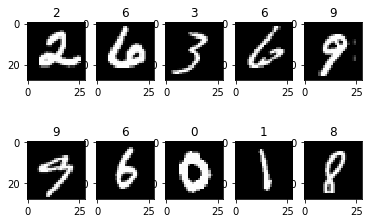

In [242]:
plot(x_test[0:10],prediction[0:10])